In [1]:
import gzip, pickle
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from IPython.display import HTML
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
corpus = [
    "The sun is warm, warm, warm!",
    "The coldest winters last forever",
    "Cooling off in the pool is nice",
    "Summer is warmer than winter. It is the warmest.",
    "The coldest beer is the best beer"
]

### Stemmer / Tokenizer

In [3]:
default_tokenizer = CountVectorizer().build_tokenizer()
ss = SnowballStemmer('english')
ls = LancasterStemmer()

def stemmed_tokenizer(doc):
    tokens = default_tokenizer(doc)
    return list(map(ls.stem, map(ss.stem, tokens)))

### Vectorize bi-gram and 1-gram, bi-gram

In [4]:
vectorizer = CountVectorizer(ngram_range=(2,2), tokenizer=stemmed_tokenizer)
bigrams = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(bigrams.toarray())

['beer is', 'best beer', 'coldest beer', 'coldest wint', 'cool off', 'in the', 'is nic', 'is the', 'is warm', 'it is', 'last forev', 'off in', 'pool is', 'sum is', 'sun is', 'than wint', 'the best', 'the coldest', 'the pool', 'the sun', 'the warmest', 'warm than', 'warm warm', 'wint it', 'wint last']
[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 2 0 0]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0]
 [1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]]


In [5]:
vectorizer2 = CountVectorizer(ngram_range=(1,2), tokenizer=stemmed_tokenizer)
bigrams2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names())
print(bigrams2.toarray())

['beer', 'beer is', 'best', 'best beer', 'coldest', 'coldest beer', 'coldest wint', 'cool', 'cool off', 'forev', 'in', 'in the', 'is', 'is nic', 'is the', 'is warm', 'it', 'it is', 'last', 'last forev', 'nic', 'off', 'off in', 'pool', 'pool is', 'sum', 'sum is', 'sun', 'sun is', 'than', 'than wint', 'the', 'the best', 'the coldest', 'the pool', 'the sun', 'the warmest', 'warm', 'warm than', 'warm warm', 'warmest', 'wint', 'wint it', 'wint last']
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
  3 0 2 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
  0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1
  1 1 0 1 1 1 0]
 [2 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 0 0 0
  0 0 0 0 0 0 0]]


In [6]:
similarities = cosine_similarity(bigrams)
similarities2 = cosine_similarity(bigrams2)

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


0 The sun is warm, warm, warm!
1 The coldest winters last forever
2 Cooling off in the pool is nice
3 Summer is warmer than winter. It is the warmest.
4 The coldest beer is the best beer


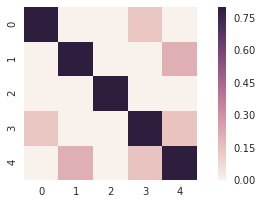

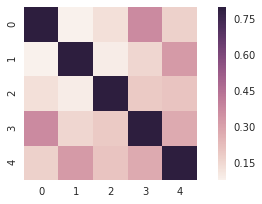

In [7]:
#http://seaborn.pydata.org/examples/network_correlations.html?highlight=correlation

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 3))

# Draw the heatmap using seaborn
sns.heatmap(similarities, vmax=.8, square=True)

f.tight_layout()
plt.plot()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 3))

# Draw the heatmap using seaborn
sns.heatmap(similarities2, vmax=.8, square=True)

f.tight_layout()
plt.plot()


for i, v in enumerate(corpus):
    print(i, v)

# Apply on Movie Quotes

In [8]:
def read_file(name):
    contents = None
    with gzip.open(name) as f:
        contents = pickle.load(f)
    return contents

movies_df = read_file('df_movies.pkl.gz')
characters_df = read_file('df_characters.pkl.gz')
lines_df = read_file('df_lines.pkl.gz')
conversations_df = read_file('df_conversations.pkl.gz')

HTML(movies_df.tail(1).to_html() + \
    characters_df.tail(1).to_html() + \
    lines_df.tail(1).to_html() + \
    conversations_df.tail(1).to_html())

In [9]:
default_tokenizer = CountVectorizer().build_tokenizer()
def lines_tokenizer(doc):
    tokens = default_tokenizer(doc)
    return list(map(ss.stem, tokens))

In [10]:
vectorizer = TfidfVectorizer(tokenizer=lines_tokenizer, ngram_range=(1,3))

In [11]:
%time tf = vectorizer.fit_transform(lines_df['text'])
features = vectorizer.get_feature_names()

CPU times: user 1min 2s, sys: 479 ms, total: 1min 2s
Wall time: 1min 2s


### Results

In [12]:
def get_matches(vectorizer, tf, count, doc):
    vector = vectorizer.transform([doc])
    
    sims = cosine_similarity(vector, tf)
    ordered_ixs = np.argsort(sims[0])[::-1]
    
    return [lines_df.iloc[ordered_ixs[i]] for i in range(count)]

In [13]:
simple_vec_bi = CountVectorizer(ngram_range=(1,2))
simple_vec_bi_tf = simple_vec_bi.fit_transform(lines_df['text'])

simple_vec_bi_tri = CountVectorizer(ngram_range=(1,3))
simple_vec_bi_tri_tf = simple_vec_bi_tri.fit_transform(lines_df['text'])

simple_vec_bi_tri_stem = CountVectorizer(ngram_range=(1,3), tokenizer=lines_tokenizer)
simple_vec_bi_tri_stem_tf = simple_vec_bi_tri_stem.fit_transform(lines_df['text'])

simple_vec_bi_tri_stem_stop = CountVectorizer(ngram_range=(1,3), stop_words='english', tokenizer=lines_tokenizer)
simple_vec_bi_tri_stem_stop_tf = simple_vec_bi_tri_stem_stop.fit_transform(lines_df['text'])

In [14]:
compare_string = "beam me up scotty"
#compare_string = "What is your favourite place in the world?"
#compare_string = "Chewie, we're home."
#compare_string = "Magic Mirror on the wall, who is the fairest one of all?"
#compare_string = "Just when I thought I was out, they pull me back in."
#compare_string = "Fasten your seatbelts. It's going to be a bumpy night."

test_vecs = [
    [simple_vec_bi, simple_vec_bi_tf],
    [simple_vec_bi_tri, simple_vec_bi_tri_tf],
    [simple_vec_bi_tri_stem, simple_vec_bi_tri_stem_tf],
    [simple_vec_bi_tri_stem_stop, simple_vec_bi_tri_stem_stop_tf]
    ]

for (test_vec, test_tf) in test_vecs:
    print('stopwords:', test_vec.stop_words, ', tokenizer:', test_vec.tokenizer)
    print('----------')
    for line in get_matches(test_vec, test_tf, 2, compare_string):
        print(line['text'])
    print()


stopwords: None , tokenizer: None
----------
Thank you. For everything.  Beam me up, Scotty.
Pick me up?

stopwords: None , tokenizer: None
----------
Thank you. For everything.  Beam me up, Scotty.
I really did think I was still in reality. At least, until now.  Beam me up, Scotty!

stopwords: None , tokenizer: <function lines_tokenizer at 0x7f263b6608c8>
----------
Thank you. For everything.  Beam me up, Scotty.
I really did think I was still in reality. At least, until now.  Beam me up, Scotty!

stopwords: english , tokenizer: <function lines_tokenizer at 0x7f263b6608c8>
----------
Can you beam him off?
Scottie?



In [15]:
idf_simple_vec_bi = TfidfVectorizer(ngram_range=(1,2))
idf_simple_vec_bi_tf = idf_simple_vec_bi.fit_transform(lines_df['text'])

idf_simple_vec_bi_tri = TfidfVectorizer(ngram_range=(1,3))
idf_simple_vec_bi_tri_tf = idf_simple_vec_bi_tri.fit_transform(lines_df['text'])

idf_simple_vec_bi_tri_stem = TfidfVectorizer(ngram_range=(1,3), tokenizer=lines_tokenizer)
idf_simple_vec_bi_tri_stem_tf = idf_simple_vec_bi_tri_stem.fit_transform(lines_df['text'])

idf_simple_vec_bi_tri_stem_stop = TfidfVectorizer(ngram_range=(1,3), stop_words='english', tokenizer=lines_tokenizer)
idf_simple_vec_bi_tri_stem_stop_tf = idf_simple_vec_bi_tri_stem_stop.fit_transform(lines_df['text'])

In [16]:
compare_string = "beam me up scotty"
compare_string = "What is your favourite place in the world?"
#compare_string = "Chewie, we're home."
#compare_string = "Magic Mirror on the wall, who is the fairest one of all?"
#compare_string = "Just when I thought I was out, they pull me back in."
#compare_string = "Fasten your seatbelts. It's going to be a bumpy night."

test_vecs = [
    [idf_simple_vec_bi, idf_simple_vec_bi_tf],
    [idf_simple_vec_bi_tri, idf_simple_vec_bi_tri_tf],
    [idf_simple_vec_bi_tri_stem, idf_simple_vec_bi_tri_stem_tf],
    [idf_simple_vec_bi_tri_stem_stop, idf_simple_vec_bi_tri_stem_stop_tf]
    ]

for (test_vec, test_tf) in test_vecs:
    print('stopwords:', test_vec.stop_words, ', tokenizer:', test_vec.tokenizer)
    print('----------')
    for line in get_matches(test_vec, test_tf, 2, compare_string):
        print(line['text'])
    print()


stopwords: None , tokenizer: None
----------
This is my favourite place in the city.
It's your favourite...

stopwords: None , tokenizer: None
----------
This is my favourite place in the city.
In the world.

stopwords: None , tokenizer: <function lines_tokenizer at 0x7f263b6608c8>
----------
This is my favourite place in the city.
In the world.

stopwords: english , tokenizer: <function lines_tokenizer at 0x7f263b6608c8>
----------
I thought I'd show you one of my favourite places.
This is my favourite place in the city.



# Export for use in motalk

In [17]:
idf_simple_vec_bi_tri

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [18]:
import gzip, pickle

def save_file(name, df):
    with gzip.open(name, 'w') as f:
        pickle.dump(df, f)

save_file('idf_simple_vec_bi_tri.pkl.gz', idf_simple_vec_bi_tri)
save_file('idf_simple_vec_bi_tri_tf.pkl.gz', idf_simple_vec_bi_tri_tf)
